In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]


PATH = '/net/granat/users/meinecke/QDMLL/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:

import os
from natsort import realsorted

def get_GA_score(path):

    filenames = []
    # r=root, d=directories, f = filenames
    for r, d, f in os.walk(path):
        for file in f:
            if 'scores_' in file:
                filenames.append(os.path.join(r, file))
    
    assert filenames != []
    
    filenames = realsorted(filenames)

#     for f in filenames:
#         print(f)

    GA_data = [] # that data goes into this list
    for fn in filenames:
        GA_data.append(np.loadtxt(fn)) #load linescan an append to the list of linescans - each linescan is matrix

    GA_data = np.asarray(GA_data) #create numpy ndarray from list -- contains all the data -- format [number of files, sweep steps, data column]
    
    return GA_data



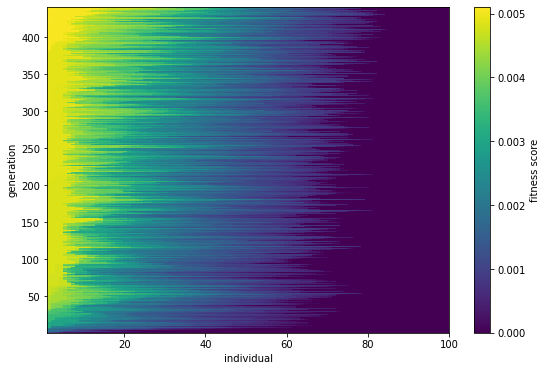

In [9]:
RUN = 'GA_seed_818/'
path = PATH+RUN

scans = get_GA_score(path)


extent = [1,scans.shape[1], 1,scans.shape[0]]

plt.imshow(scans, aspect='auto', interpolation='none', origin='lower', extent=extent)

cb = plt.colorbar()
cb.set_label('fitness score')

plt.xlabel('individual')
plt.ylabel('generation')

plt.show()

(500, 100)
(441, 100)


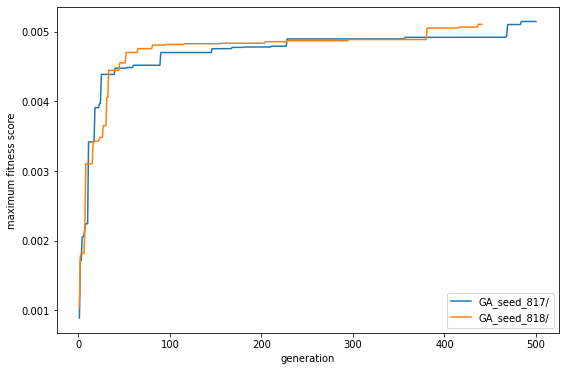

In [10]:
runs = ['GA_seed_817/','GA_seed_818/']

scans = []

for run in runs:
    path = PATH + run
    scans.append(get_GA_score(path))

for k,scan in enumerate(scans):
    print(scan.shape)
    plt.plot(np.arange(1,scan.shape[0]+0.5),scan[:,0],label=runs[k])
    
plt.xlabel('generation')
plt.ylabel('maximum fitness score')

plt.legend()

plt.show()